In [11]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [12]:
import exponax as ex

In [13]:
import vape

# 3D KS

In [28]:
ks_3d_steppr = ex.stepper.KuramotoSivashinsky(3, 30.0, 64, 0.1)

In [29]:
u_0 = jax.random.normal(jax.random.PRNGKey(0), (1, 64, 64, 64))

In [31]:
trj = ex.rollout(ks_3d_steppr, 150, include_init=True)(u_0)

In [32]:
jnp.save("ks_3d_trj.npy", trj)

Open https://keksboter.github.io/vape/ in your browser

In [33]:
# Currently not working
# vape.viewer(trj, plt.get_cmap("RdBu_r"))

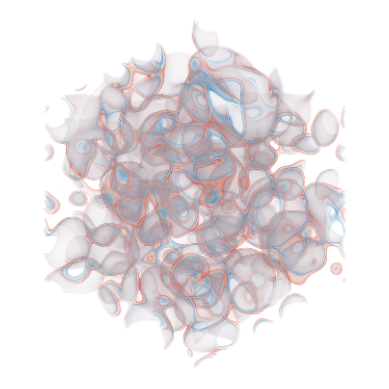

In [34]:
ex.viz.plot_state_3d(trj[-1])

In [35]:
ani = ex.viz.animate_state_3d(trj)
ani.save("ks_3d.mp4")

# 3D Burgers

In [61]:
burgers_3d_steppr = ex.stepper.Burgers(3, 1.0, 64, 0.005, diffusivity=0.01)

In [62]:
u_0 = (
    ex.ic.RandomMultiChannelICGenerator(
        [
            ex.ic.RandomTruncatedFourierSeries(3, max_one=True, cutoff=3),
        ]
        * 3
    )(64, key=jax.random.PRNGKey(0))
    * 3
)

In [63]:
trj = ex.rollout(burgers_3d_steppr, 20, include_init=True)(u_0)

In [64]:
jnp.save("burgers_3d_trj.npy", trj)

Open https://keksboter.github.io/vape/ in your browser

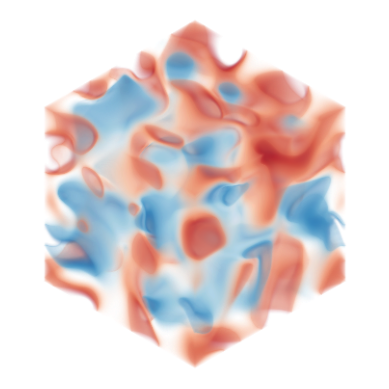

In [65]:
ex.viz.plot_state_3d(trj[-1])

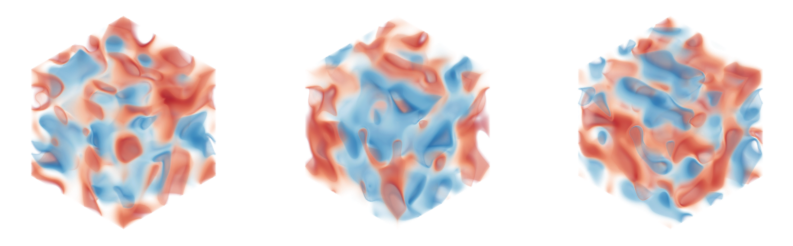

In [66]:
ex.viz.plot_state_3d_facet(trj[-1])

In [68]:
ani = ex.viz.animate_state_3d_facet(trj, grid=(1, 3), figsize=(15, 5))
ani.save("burgers_3d.mp4")